# Imports

In [46]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pickle
import requests

from sklearn import metrics as m
from sklearn import linear_model as lm
from sklearn import model_selection as ms

# Functions 

In [47]:
def drop_outliers_LI (quant):
    Q1 = quant.quantile(0.25)
    Q3 = quant.quantile(0.75)
    
    LI = Q1 - (1.5*(Q3-Q1))
    
    
    return LI


def drop_outliers_LS (quant):
    Q1 = quant.quantile(0.25)
    Q3 = quant.quantile(0.75)
    
    LS = Q1 + (1.5*(Q3-Q1))
   
    return LS

def heat_map(inform):
    
    correlation = inform.corr()
    f, ax = plt.subplots(figsize=(10, 6))
    return sns.heatmap(correlation,cmap="YlGnBu", fmt='.2f', square='true', linecolor='white', linewidths=.5, ax=ax, annot=True);

# Loading Data 

In [48]:
data = pd.read_csv('C:/Users/jvito/Repos - Python/datasets/Car_Purchasing_Data.csv')

## Exploratory Data Analysis

In [49]:
data.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [50]:
data.dtypes

Customer Name           object
Customer e-mail         object
Country                 object
Gender                   int64
Age                      int64
Annual Salary          float64
Credit Card Debt       float64
Net Worth              float64
Car Purchase Amount    float64
dtype: object

In [51]:
data.columns = data.columns.str.replace(' ', '_')

In [52]:
(data.isnull().sum()/data.shape[0]).sort_values(ascending=False)

Customer_Name          0.0
Customer_e-mail        0.0
Country                0.0
Gender                 0.0
Age                    0.0
Annual_Salary          0.0
Credit_Card_Debt       0.0
Net_Worth              0.0
Car_Purchase_Amount    0.0
dtype: float64

Observa-se que não há dados faltantes da base de dados.

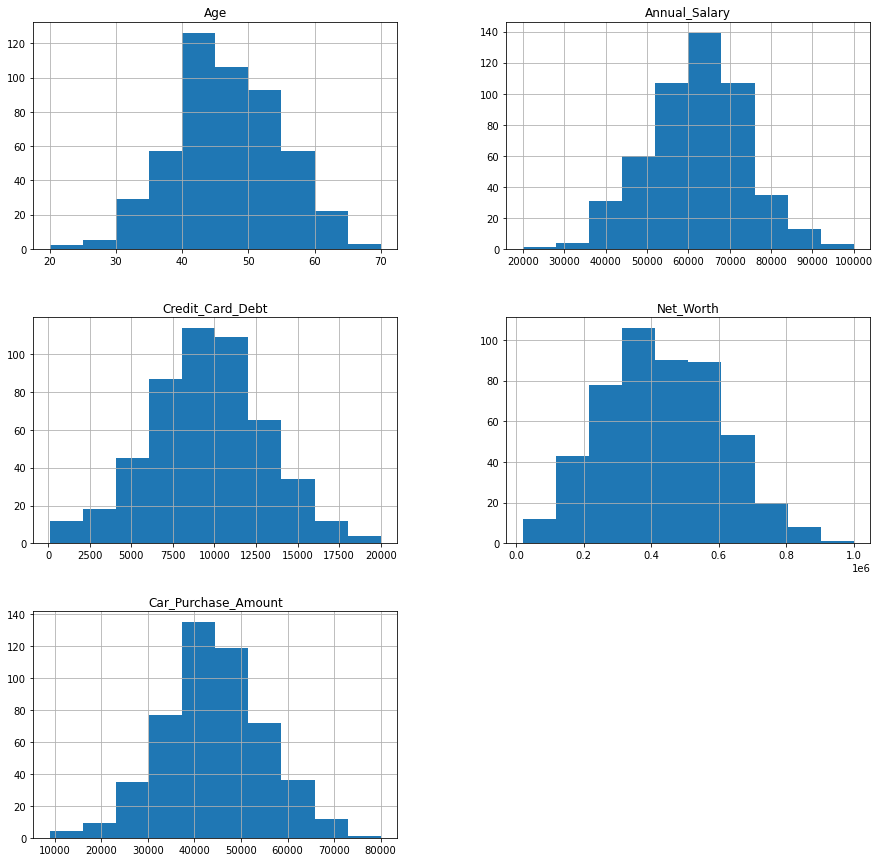

In [53]:
data[['Age', 'Annual_Salary', 'Credit_Card_Debt', 'Net_Worth', 'Car_Purchase_Amount']].hist(figsize=(15, 15));

As variáveis seguem uma distribuição normal, sendo adequadas para o uso do modelo.

In [54]:
data.describe()

,Gender,Age,Annual_Salary,Credit_Card_Debt,Net_Worth,Car_Purchase_Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.224000,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.990339,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,41.000000,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.000000,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,52.000000,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


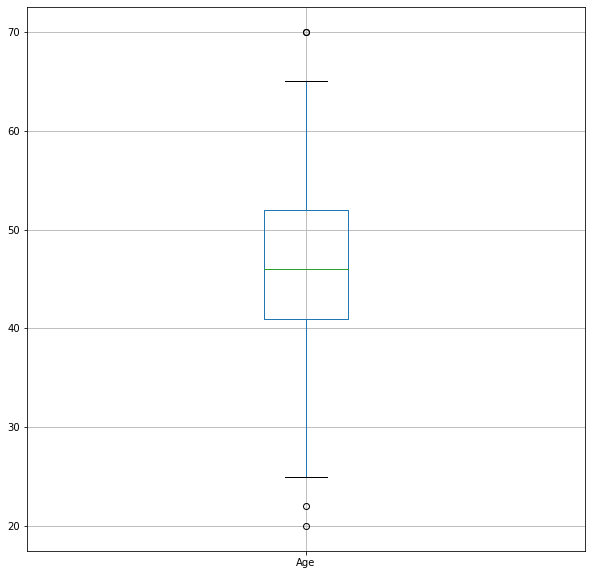

In [55]:
data[['Age']].boxplot(figsize=(10,10));

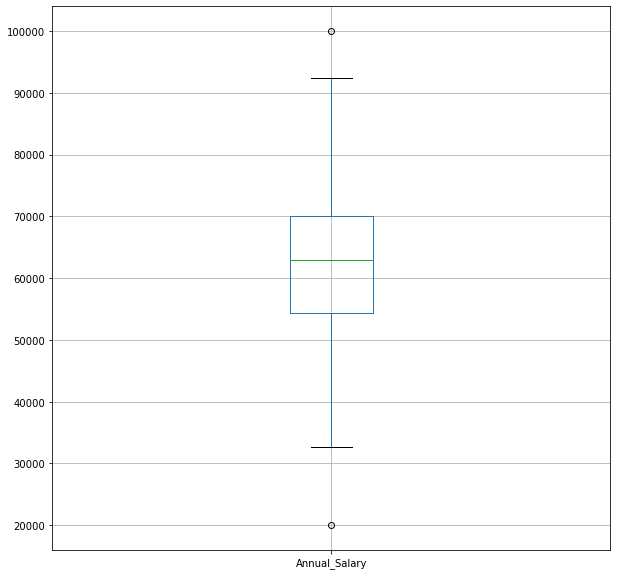

In [56]:
data[['Annual_Salary']].boxplot(figsize=(10,10));

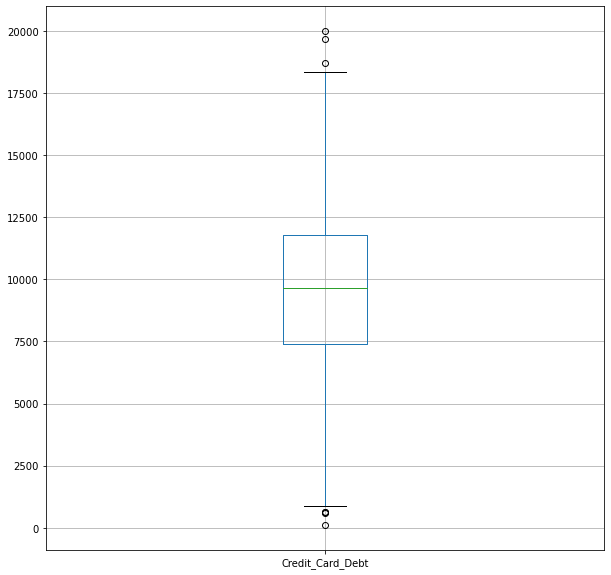

In [57]:
data[['Credit_Card_Debt']].boxplot(figsize=(10,10));

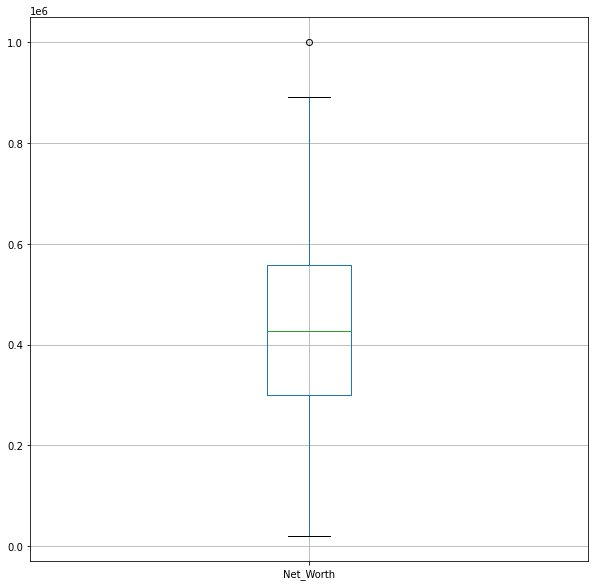

In [58]:
data[['Net_Worth']].boxplot(figsize=(10,10));

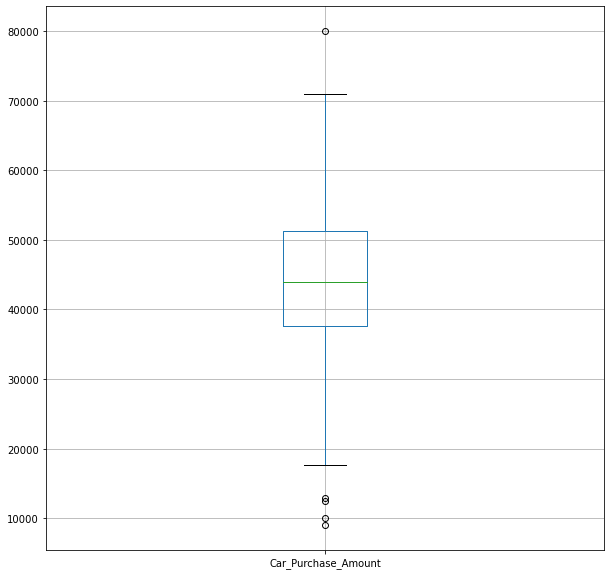

In [59]:
data[['Car_Purchase_Amount']].boxplot(figsize=(10,10));

Observou-se a presença de outliers, que por sua vez, deverão ser removidos para garantir a melhor adequação do modelo.

### Drop Outliers

In [60]:
df = data.copy()
df.shape

(500, 9)

In [61]:
df.head()

,Customer_Name,Customer_e-mail,Country,Gender,Age,Annual_Salary,Credit_Card_Debt,Net_Worth,Car_Purchase_Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [62]:
LI = drop_outliers_LI(data['Age'])
df.drop(df[df.Age<LI].index, axis=0, inplace=True)

LS = drop_outliers_LS(data['Age'])
df.drop(df[df.Age>LS].index, axis=0, inplace=True)

In [63]:
LI = drop_outliers_LI(data['Annual_Salary'])
df.drop(df[df.Annual_Salary<LI].index, axis=0, inplace=True)

LS = drop_outliers_LS(data['Annual_Salary'])
df.drop(df[df.Annual_Salary>LS].index, axis=0, inplace=True)

In [64]:
LI = drop_outliers_LI(data['Credit_Card_Debt'])
df.drop(df[df.Credit_Card_Debt<LI].index, axis=0, inplace=True)

LS = drop_outliers_LS(data['Credit_Card_Debt'])
df.drop(df[df.Credit_Card_Debt>LS].index, axis=0, inplace=True)

In [65]:
LI = drop_outliers_LI(data['Car_Purchase_Amount'])
df.drop(df[df.Car_Purchase_Amount<LI].index, axis=0, inplace=True)

LS = drop_outliers_LS(data['Car_Purchase_Amount'])
df.drop(df[df.Car_Purchase_Amount>LS].index, axis=0, inplace=True)

<AxesSubplot:>

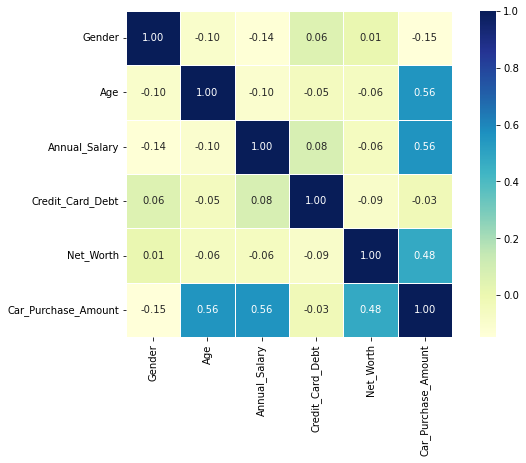

In [66]:
heat_map(df)

O mapa de calor tem o objetivo de verificar quais variáveis disponíveis possuem uma maior correlação com a variável de interesse (Car_Purchase_Amount). Sendo assim, três delas foram escolhidas:

 * Age;
 * Annual_Salary;
 * Net_Worth.

## Data Preparation

In [67]:
x = df.drop(['Car_Purchase_Amount', 'Customer_Name', 'Customer_e-mail', 'Country', 'Gender', 'Credit_Card_Debt'], axis=1)

y = df['Car_Purchase_Amount'].copy()

In [68]:
x_train, x_test, y_train, y_test = ms.train_test_split(x, y, test_size=0.2, random_state=42)

# Model Training 

In [69]:
# Model description
model_lr = lm.LinearRegression()


# Model training
model_lr.fit(x_train, y_train)

LinearRegression()

In [70]:
# Prediction - train
pred_train = model_lr.predict(x_train)

# Prediction - test
pred_test = model_lr.predict(x_test)

## Performance Metrics

In [71]:
# MAE and MAPE - Train
mae_train = m.mean_absolute_error(y_train, pred_train)

mape_train = m.mean_absolute_percentage_error(y_train, pred_train)

# MAE and MAPE - Test
mae_test = m.mean_absolute_error(y_test, pred_test)

mape_test = m.mean_absolute_percentage_error(y_test, pred_test)

In [72]:
Performance_metrics = pd.DataFrame({'DataFrame': ['training', 'test'],
                                    'MAE': [mae_train, mae_test],
                                    'MAPE': [mape_train, mape_test]})

In [73]:
Performance_metrics

,DataFrame,MAE,MAPE
0,training,212.853900,0.005440
1,test,220.664434,0.005743


In [74]:
score_test = model_lr.score(x_test, y_test)

In [75]:
score_test

0.9991295606907143

O modelo possui um score de 99,91%

In [76]:
# Save trained model

pickle.dump(model_lr, open('C:/Users/jvito/Repos - Python/Deploy/model_car_price.pkl', 'wb'))

## Prediction

In [77]:
df_predict = df.drop(['Car_Purchase_Amount', 'Customer_Name', 'Customer_e-mail', 'Country', 'Gender', 'Credit_Card_Debt'],  axis=1).sample()

In [78]:
df_predict

,Age,Annual_Salary,Net_Worth
166,36,52477.66494,97706.89181


In [79]:
df_predict_json = df_predict.to_json(orient='records')

In [80]:
df_predict_json

'[{"Age":36,"Annual_Salary":52477.66494,"Net_Worth":97706.89181}]'

In [84]:
url = 'http://192.168.15.9:5000/predict'
data = df_predict_json
header = {'Content-type': 'application/json'}

# Request
r = requests.post(url=url, data=data, headers=header)

In [85]:
r

<Response [200]>

In [83]:
pd.DataFrame(r.json(), columns=r.json()[0].keys())

,Age,Annual_Salary,Net_Worth,predction
0,36,52477.66494,97706.89181,20551.392561
